In [1]:
package InterfaceDefinitions{
    import SI::*;
    
    item def Data;
    item def Signal;
    item def Charge;
    
    port def PowerInPort{
        attribute volts :> ISQ::voltage;
        attribute current:>ISQ::electricCurrent;
        in item powersupply:Charge;
    }
    port def PowerOutPort{
        attribute volts:>ISQ::voltage;
        attribute current:>ISQ::electricCurrent;
        out item powersupply:Charge;
    }
    interface def PowerFlow{
        end charger : PowerOutPort;
        end chargee: PowerInPort;
    }
    
    port def controlPin{
        in item data : Data;
        out item controlsignal : Signal;
    }
    
    port def SignalPin{
        out item data : Data;
        in item controlsignal : Signal;
    }
    
    interface def DataCommand{
        end controller : controlPin;
        end receiver : SignalPin;
    }
}

Package InterfaceDefinitions (3cc9ca10-8367-4641-a293-f57c7308856d)


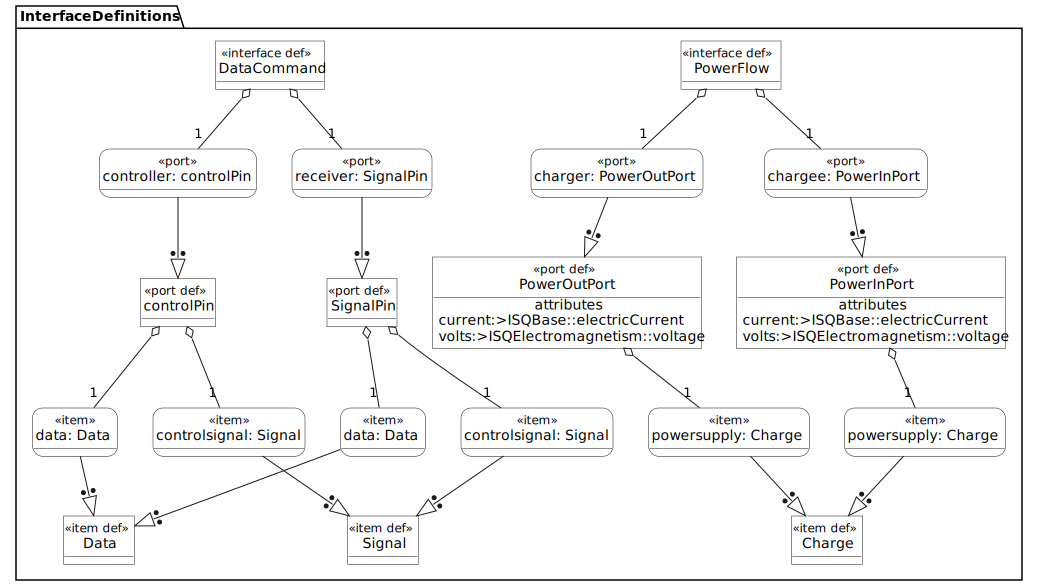

In [9]:
%viz --view=tree InterfaceDefinitions

In [5]:
package CubesatConfiguration{
    import SI::*;
    import InterfaceDefinitions::*;
    import RealFunctions::*;
    
    part def Component{
        attribute mass:> ISQ::mass;
    }
    
    
    part def System :> Component{
        attribute individualmass :>> mass;
        part Subsystems : Component[*];
        attribute totalmass :> ISQ::mass = individualmass + sum(Subsystems.mass);
            
    }
    part def Cubesat :> System{
        attribute cubes : Integer default 12 ;
        attribute name : String;
        part subsystems : Component[*]:>>Subsystems;
        part def Bus :> Component{
            attribute :>> mass = 4 [kg];
        }
        
        part Board : Component{
            attribute name : String;
            attribute startupVoltage :> ISQ::voltage;
            attribute operatingVoltage:> ISQ::voltage;
            port powSup: PowerInPort;
            part headers {
                port controllerpin : controlPin;
                port poweroutput : PowerOutPort;
                port def poweroutfive :>PowerOutPort {
                    attribute:>>volt=5[V];
                }
            }
        }
        
        part Experiment : Component{
            attribute name:String;
            attribute dataType : String;
            port SignalReader : SignalPin;
            port powerSupply : PowerInPort;
        }

        part Battery : Component{
            attribute voltage:>ISQ::voltage;
            port poweroutput : PowerOutPort;
            attribute isRechargeable : Boolean default false;
        }
        
        interface : PowerFlow connect
            charger ::> Battery.poweroutput to
            chargee ::> Board.powSup;
        
        interface : PowerFlow connect
            charger ::> Board.headers.poweroutput to
            chargee ::> Experiment.powerSupply;   
        
        interface : DataCommand connect
            controller ::> Board.headers.controllerpin to
            receiver ::> Experiment.SignalReader;
    }
    
    
}

Package PayloadConfiguration (6a3f92c8-6fa2-4815-9e6a-2fdb164ad45a)


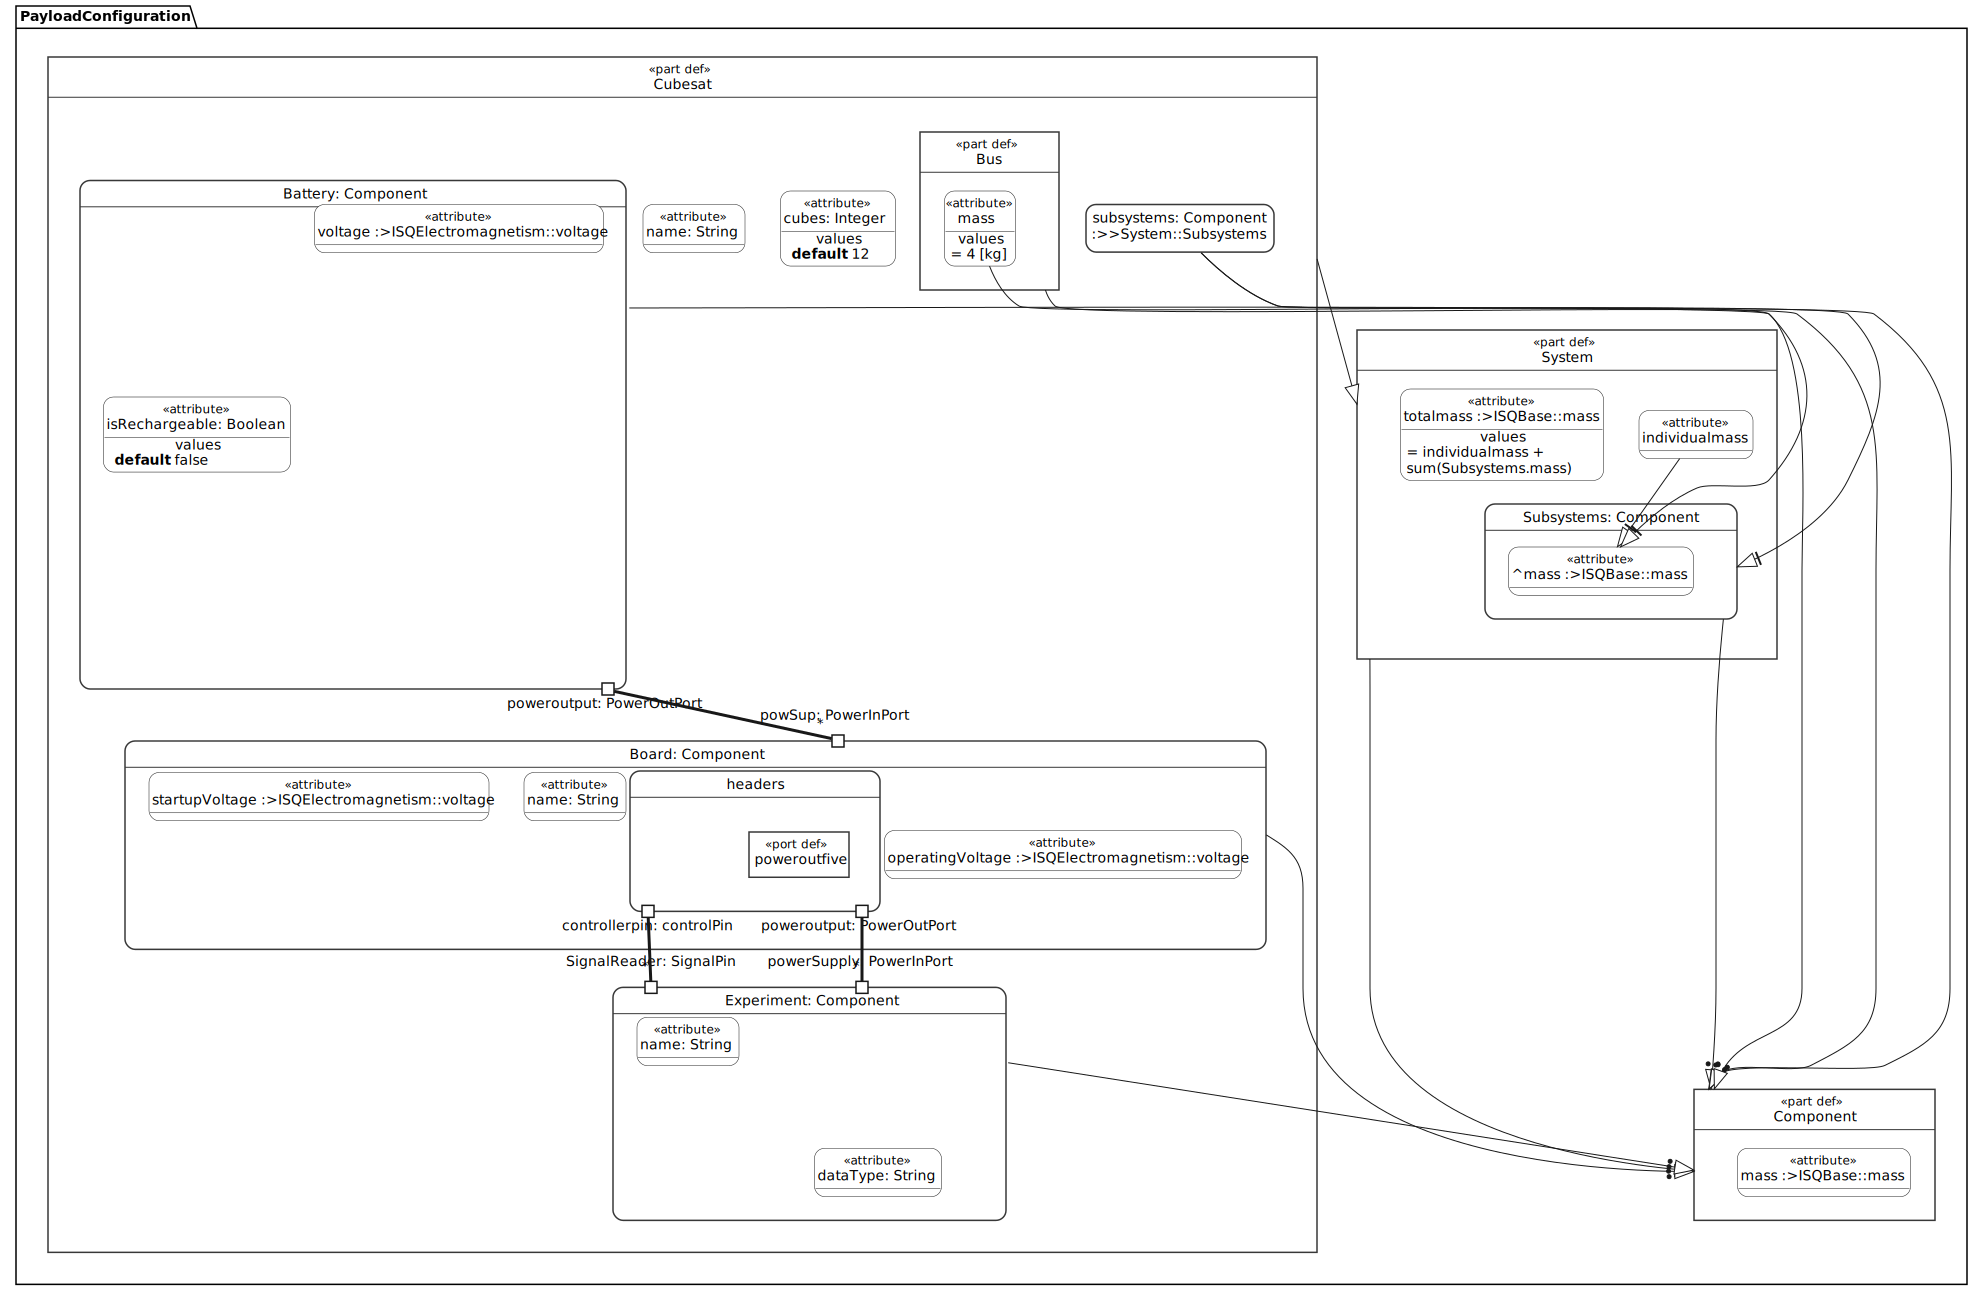

In [11]:
%viz --view=interconnection PayloadConfiguration